In [1]:
# 加载功能模块
from datetime import datetime

from vnpy.trader.constant import Interval

from elite_optionstrategy import BacktestingEngine

from bull_bear_strategy import BullBearStrategy

In [2]:
# 创建回测引擎
engine = BacktestingEngine()

engine.set_parameters(
    interval=Interval.MINUTE,
    start=datetime(2021, 1, 1),
    end=datetime(2022, 12, 31),
    rate=0,
    slippage=0.6 + (16 / 100),
)


setting = {
    "fast_window": 10,
    "slow_window": 100,
}
engine.add_strategy(BullBearStrategy, setting)

In [3]:
# 历史数据回放
engine.run_backtesting()

100%|██████████| 729/729 [36:53<00:00,  3.04s/it]


In [4]:
# 计算每日盈亏
engine.calculate_result()

2024-02-20 14:54:45.566210	开始计算逐日盯市盈亏
2024-02-20 14:54:45.571963	逐日盯市盈亏计算完成


trade_count  turnover  commission  slippage   trading_pnl  \
date                                                                    
2021-01-04            2   14020.0         0.0     152.0  1.340000e+03   
2021-01-05            0       0.0         0.0       0.0  0.000000e+00   
2021-01-06            4   38840.0         0.0     304.0 -2.728484e-12   
2021-01-07            0       0.0         0.0       0.0  0.000000e+00   
2021-01-08            4   40000.0         0.0     304.0  1.000000e+02   
...                 ...       ...         ...       ...           ...   
2022-12-26            0       0.0         0.0       0.0  0.000000e+00   
2022-12-27            4   20360.0         0.0     304.0 -1.136868e-13   
2022-12-28            0       0.0         0.0       0.0  0.000000e+00   
2022-12-29            4   20080.0         0.0     304.0  2.000000e+01   
2022-12-30            4   15620.0         0.0     304.0  0.000000e+00   

            holding_pnl  total_pnl  net_pnl  
date                                         
2021-01-04          0.0     1340.0   1188.0  
2021-01-05       4240.0     4240.0   4240.0  
2021-01-06       1400.0     1400.0   1096.0  
2021-01-07       4380.0     4380.0   4380.0  
2021-01-08      -1120.0    -1020.0  -1324.0  
...                 ...        ...      ...  
2022-12-26       -260.0     -260.0   -260.0  
2022-12-27      -1120.0    -1120.0  -1424.0  
2022-12-28        520.0      520.0    520.0  
2022-12-29        240.0      260.0    -44.0  
2022-12-30       -480.0     -480.0   -784.0  

[485 rows x 8 columns]

In [5]:
# 统计绩效结果
result = engine.calculate_statistics()

2024-02-20 14:54:45.672657	开始计算策略统计指标
2024-02-20 14:54:45.683573	------------------------------
2024-02-20 14:54:45.683573	首个交易日：	2021-01-04 00:00:00
2024-02-20 14:54:45.683573	最后交易日：	2022-12-30 00:00:00
2024-02-20 14:54:45.683573	总交易日：	485
2024-02-20 14:54:45.683573	盈利交易日：	197
2024-02-20 14:54:45.683573	亏损交易日：	288
2024-02-20 14:54:45.683573	起始资金：	1,000,000.00
2024-02-20 14:54:45.683573	结束资金：	902,156.00
2024-02-20 14:54:45.683573	总收益率：	-9.78%
2024-02-20 14:54:45.683573	年化收益：	-4.84%
2024-02-20 14:54:45.683573	最大回撤: 	-118,568.00
2024-02-20 14:54:45.683573	最大回撤%: 	-11.62%
2024-02-20 14:54:45.683573	总盈亏：	-97,844.00
2024-02-20 14:54:45.683573	总手续费：	0.00
2024-02-20 14:54:45.683573	总滑点：	98,344.00
2024-02-20 14:54:45.683573	总成交金额：	6,864,980.00
2024-02-20 14:54:45.683573	总成交笔数：	1294
2024-02-20 14:54:45.683573	日均盈亏：	-201.74
2024-02-20 14:54:45.683573	日均手续费：	0.00
2024-02-20 14:54:45.683573	日均滑点：	202.77
2024-02-20 14:54:45.683573	日均成交金额：	14,154.60
2024-02-20 14:54:45.683573	日均成交笔数：	2.6680412371134

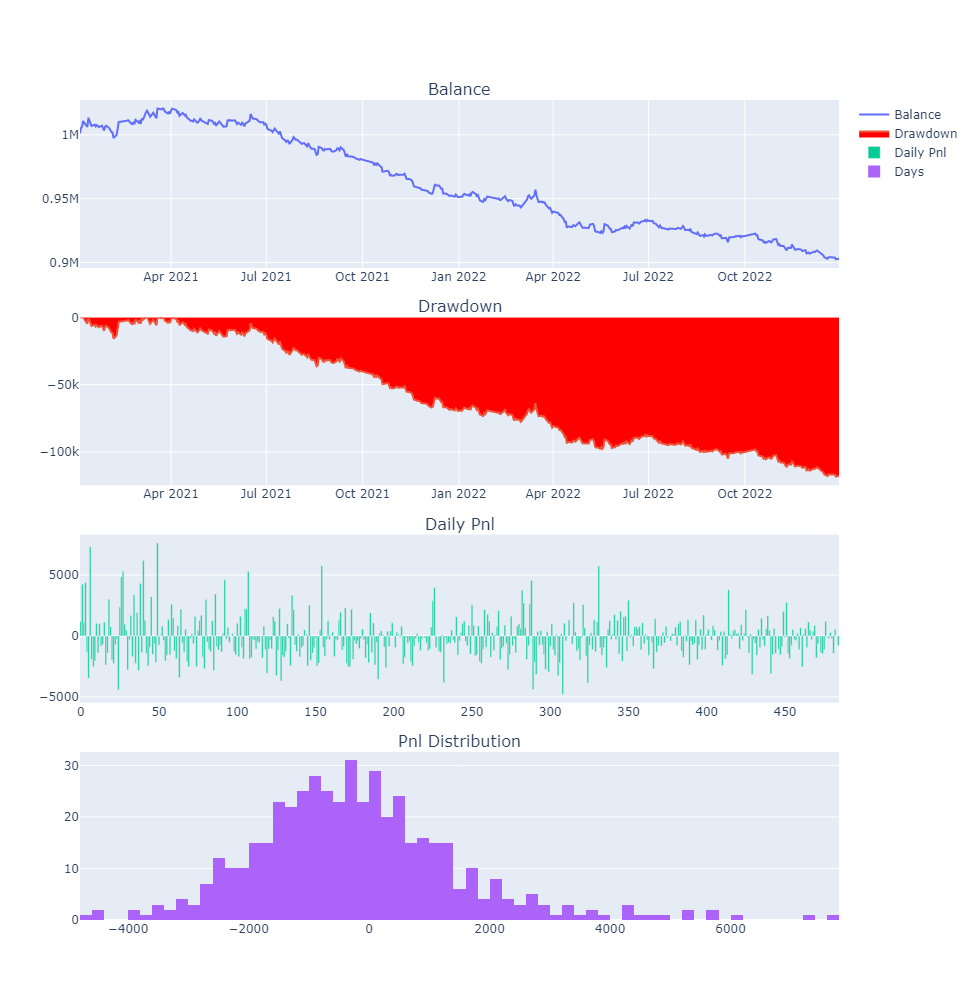

In [6]:
# 显示资金图表
engine.show_chart()

In [7]:
# 打印逐笔成交
for trade in engine.all_trades.values():
    print(trade.datetime, trade.vt_symbol, trade.direction.value, trade.offset.value, trade.volume, "@", trade.price)

2021-01-04 09:31:00+08:00 IO2101-C-5200.CFFEX 多 开 1 @ 105.8
2021-01-04 09:31:00+08:00 IO2101-C-5400.CFFEX 空 开 1 @ 34.4
2021-01-06 09:31:00+08:00 IO2101-C-5200.CFFEX 空 平 1 @ 212.0
2021-01-06 09:31:00+08:00 IO2101-C-5400.CFFEX 多 平 1 @ 78.2
2021-01-06 09:31:00+08:00 IO2101-C-5400.CFFEX 多 开 1 @ 78.2
2021-01-06 09:31:00+08:00 IO2101-C-5600.CFFEX 空 开 1 @ 20.0
2021-01-08 09:31:00+08:00 IO2101-C-5800.CFFEX 空 开 1 @ 31.8
2021-01-08 09:31:00+08:00 IO2101-C-5400.CFFEX 空 平 1 @ 199.8
2021-01-08 09:31:00+08:00 IO2101-C-5600.CFFEX 多 平 1 @ 84.2
2021-01-08 09:31:00+08:00 IO2101-C-5600.CFFEX 多 开 1 @ 84.2
2021-01-11 09:31:00+08:00 IO2101-C-5500.CFFEX 多 开 1 @ 85.4
2021-01-11 09:31:00+08:00 IO2101-C-5700.CFFEX 空 开 1 @ 26.2
2021-01-11 09:31:00+08:00 IO2101-C-5800.CFFEX 多 平 1 @ 14.0
2021-01-11 09:31:00+08:00 IO2101-C-5600.CFFEX 空 平 1 @ 46.8
2021-01-12 09:31:00+08:00 IO2101-C-5500.CFFEX 空 平 1 @ 31.0
2021-01-12 09:31:00+08:00 IO2101-C-5700.CFFEX 多 平 1 @ 3.6
2021-01-12 09:31:00+08:00 IO2101-C-5400.CFFEX 多 开 1 @ 